In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('/data/sberbank/train.csv')

### Target variable exploration --'price_doc'

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


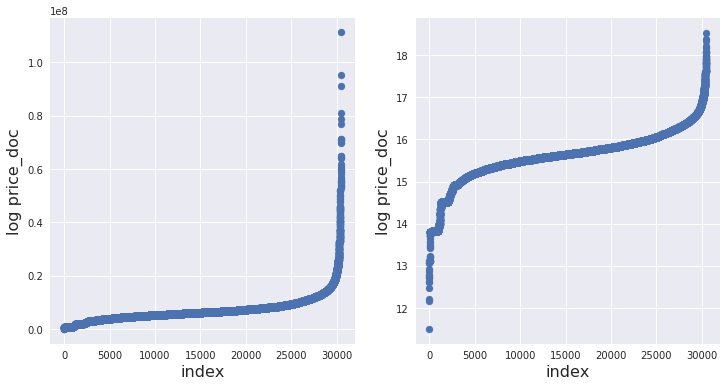

In [3]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
plt.scatter(range(len(train)),np.sort(train.price_doc))
plt.xlabel("index", fontsize = 16)
plt.ylabel("log price_doc", fontsize = 16)

ax = plt.subplot(1,2,2)
plt.scatter(range(len(train)),np.sort(np.log(train.price_doc)))
plt.xlabel("index", fontsize = 16)
plt.ylabel("log price_doc", fontsize = 16)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


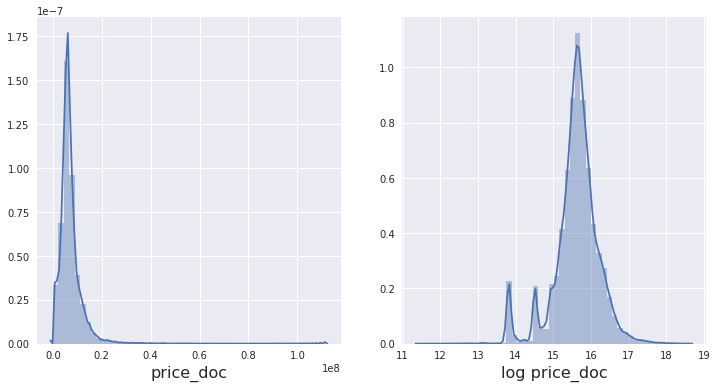

In [4]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
sns.distplot(train.price_doc.values, bins=50, kde=True)
plt.xlabel('price_doc', fontsize=16)

ax = plt.subplot(1,2,2)
sns.distplot(np.log(train.price_doc.values), bins=50, kde=True)
plt.xlabel('log price_doc', fontsize=16)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


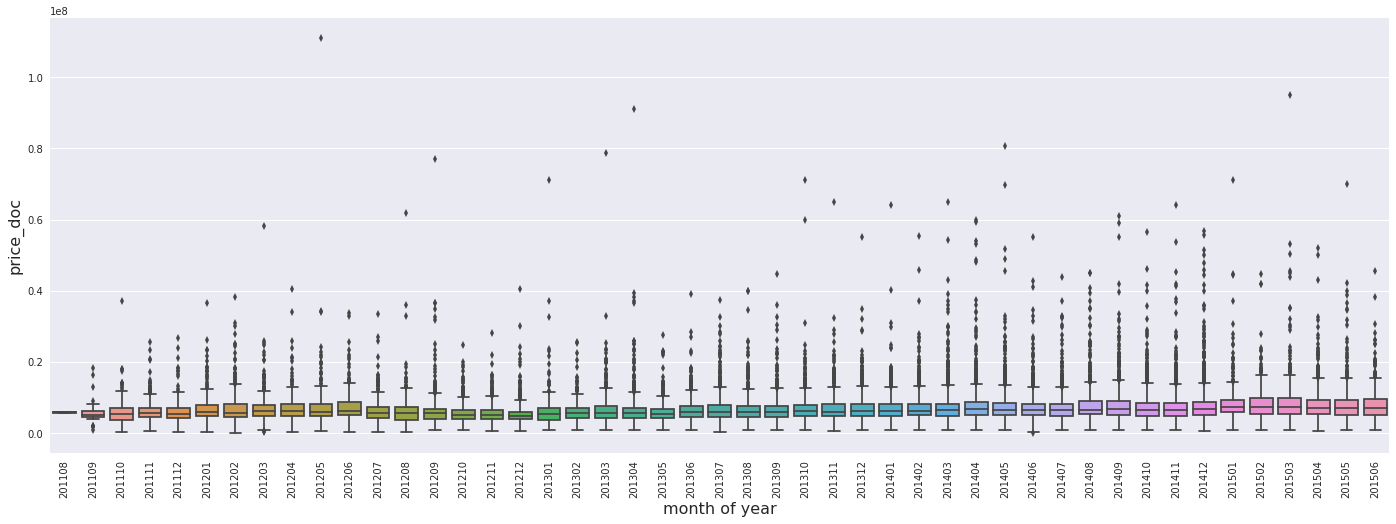

In [5]:
train['yearmonth'] = train['timestamp'].apply(lambda x :x[:4] +x[5:7])
plt.figure(figsize = (24,8))
sns.boxplot(x='yearmonth', y='price_doc', data=train)
plt.xlabel('month of year', fontsize = 16)
plt.ylabel('price_doc', fontsize = 16)
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


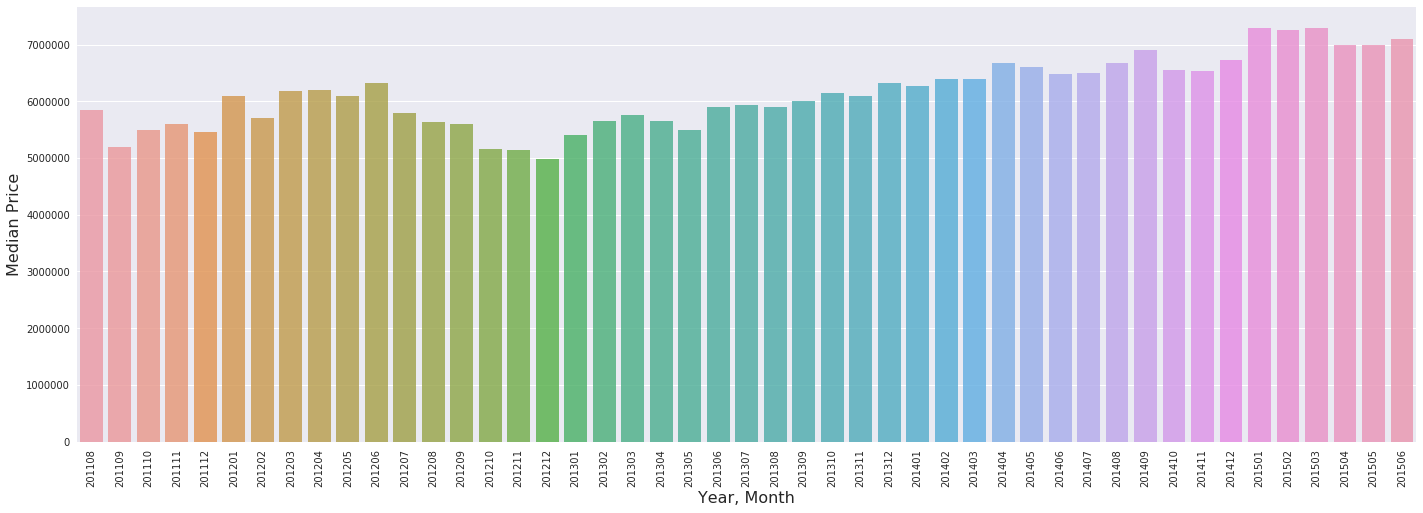

In [6]:
groupmedian = train.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize = (24,8))
sns.barplot(groupmedian.yearmonth.values, groupmedian.price_doc.values, alpha = 0.8)
plt.xlabel('Year, Month', fontsize= 16)
plt.ylabel('Median Price', fontsize = 16)
plt.xticks(rotation = 'vertical')
plt.show()

### Data types

In [7]:
train = pd.read_csv("/data/sberbank/train.csv", parse_dates=['timestamp'])
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,157
1,datetime64[ns],1
2,float64,119
3,object,15


### Missing Values

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


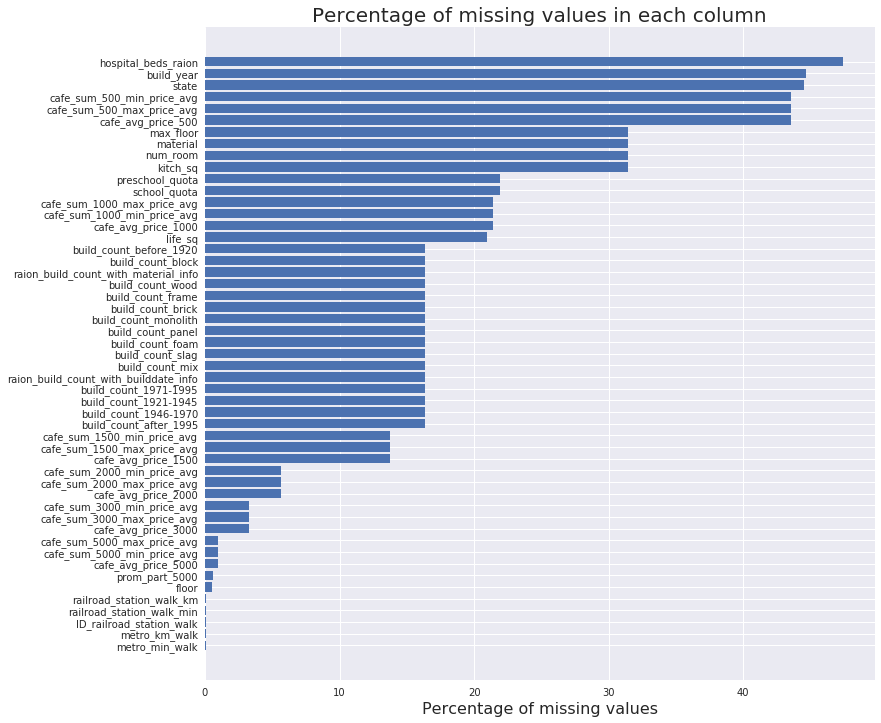

In [8]:
nan_df = pd.DataFrame(columns=['colname', 'cnt'])
nan_df['colname'] =  train.columns[train.isnull().any()].tolist() 
nan_df['cnt'] = nan_df.colname.apply( lambda x : train[x].isnull().sum(axis=0)/len(train)*100)
nan_df.sort_values(by='cnt', inplace = True)
f, ax = plt.subplots(figsize= (12,12))
idx = range(len(nan_df))
ax.barh( idx , nan_df.cnt.values )
ax.set_yticks(idx)
ax.set_yticklabels(nan_df.colname.values)
ax.set_title('Percentage of missing values in each column', fontsize = 20)
ax.set_xlabel("Percentage of missing values", fontsize = 16)
plt.show()

### Features group -- House info

#### full_sq - total area in square meters, including loggias, balconies and other non-residential areas

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


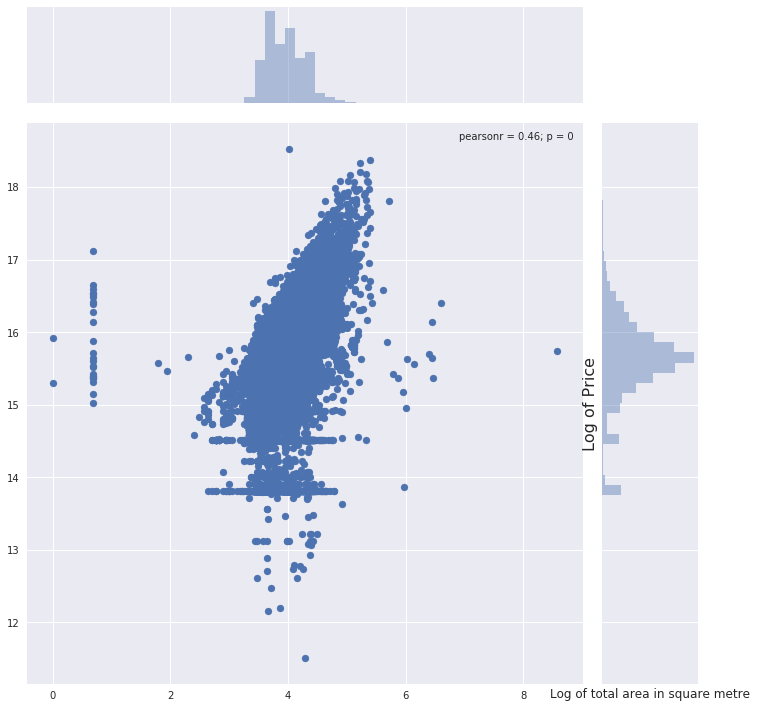

In [9]:
plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(train.full_sq.values), y=np.log1p(train.price_doc.values),  size=10)
plt.ylabel('Log of Price', fontsize=16)
plt.xlabel('Log of total area in square metre', fontsize=12)
plt.show()

#### life_sq - living area in square meters, excluding loggias, balconies and other non-residential areas

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


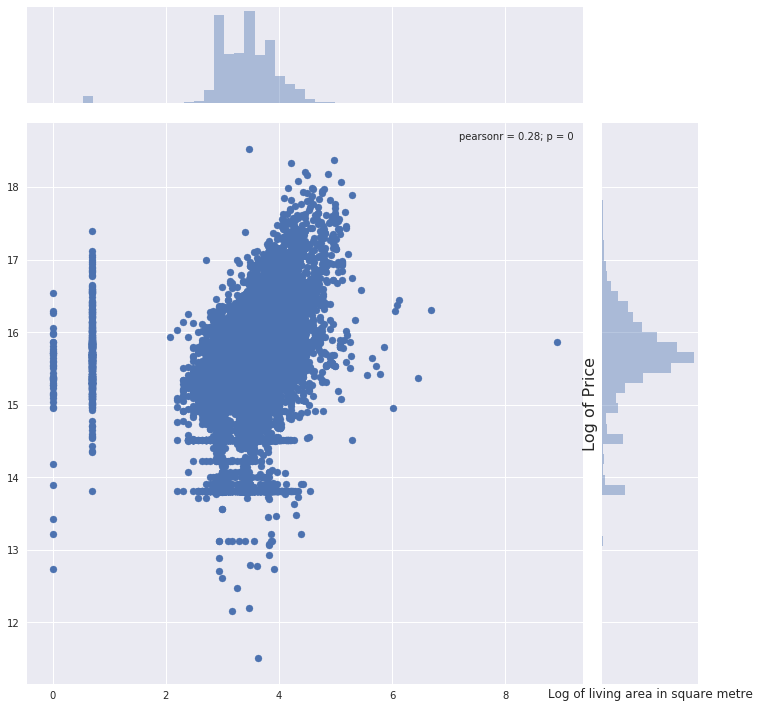

In [10]:
plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(train.life_sq.values), y=np.log1p(train.price_doc.values), size=10)
plt.ylabel('Log of Price', fontsize=16)
plt.xlabel('Log of living area in square metre', fontsize=12)
plt.show()

#### life_sq ratio : life_sq/full_sq

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


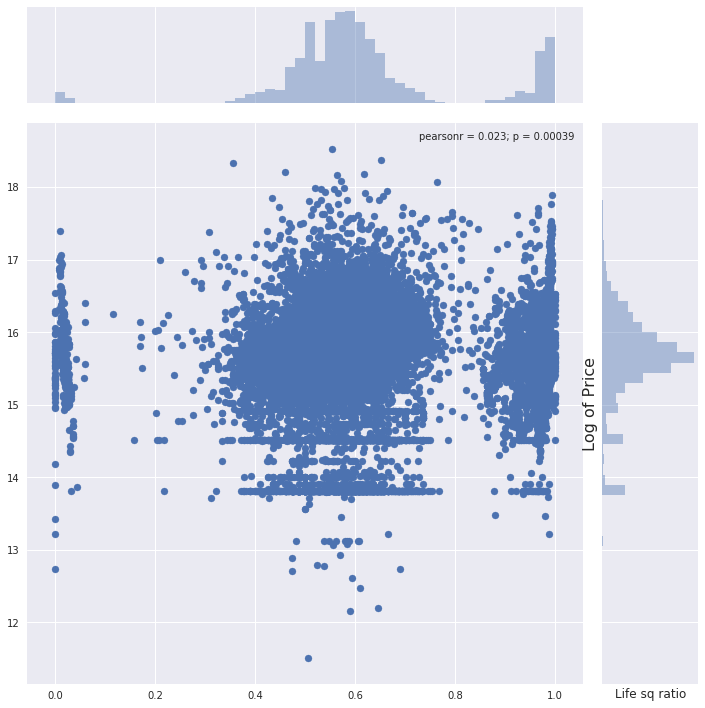

In [11]:
train['life_sq_ratio'] = train['life_sq']/(train['full_sq']+1)
train.ix[train['life_sq']>train['full_sq'], 'life_sq_ratio'] = 1
plt.figure(figsize=(12,12))
sns.jointplot(x=train.life_sq_ratio.values, y=np.log1p(train.price_doc.values), size=10)
plt.ylabel('Log of Price', fontsize=16)
plt.xlabel('Life sq ratio', fontsize=12)
plt.show()

#### floor - for apartments, floor of the building


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


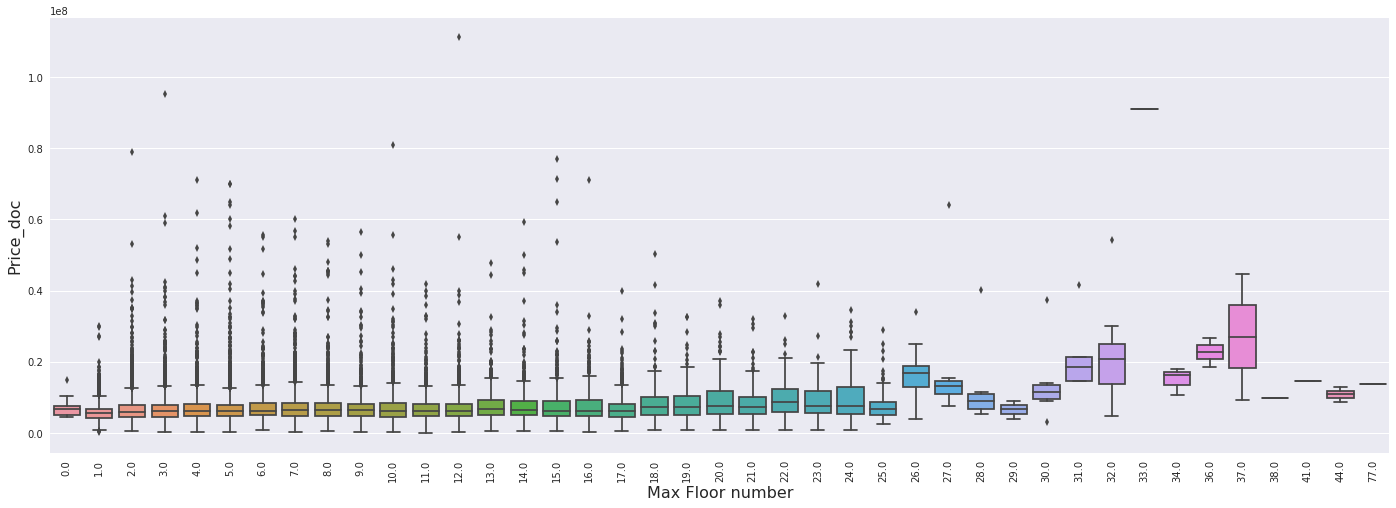

In [12]:
plt.figure(figsize=(24,8))
sns.boxplot(x="floor", y="price_doc", data=train)
plt.ylabel('Price_doc', fontsize=16)
plt.xlabel('Max Floor number', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

#### max_floor - number of floors in the building

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


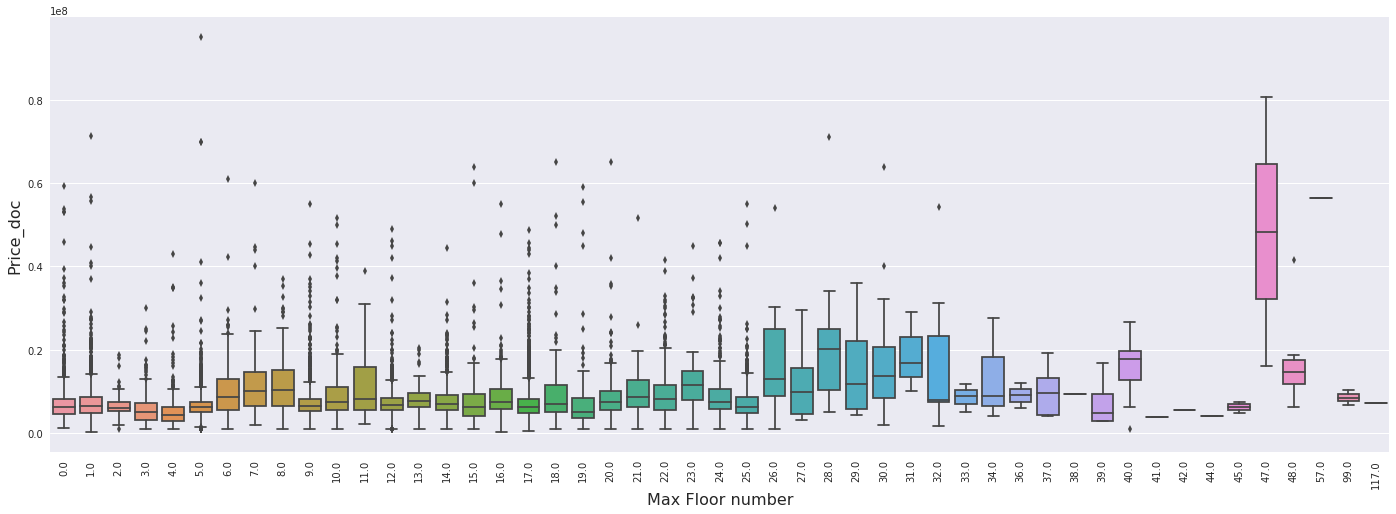

In [13]:
plt.figure(figsize=(24,8))
sns.boxplot(x="max_floor", y="price_doc", data=train)
plt.ylabel('Price_doc', fontsize=16)
plt.xlabel('Max Floor number', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


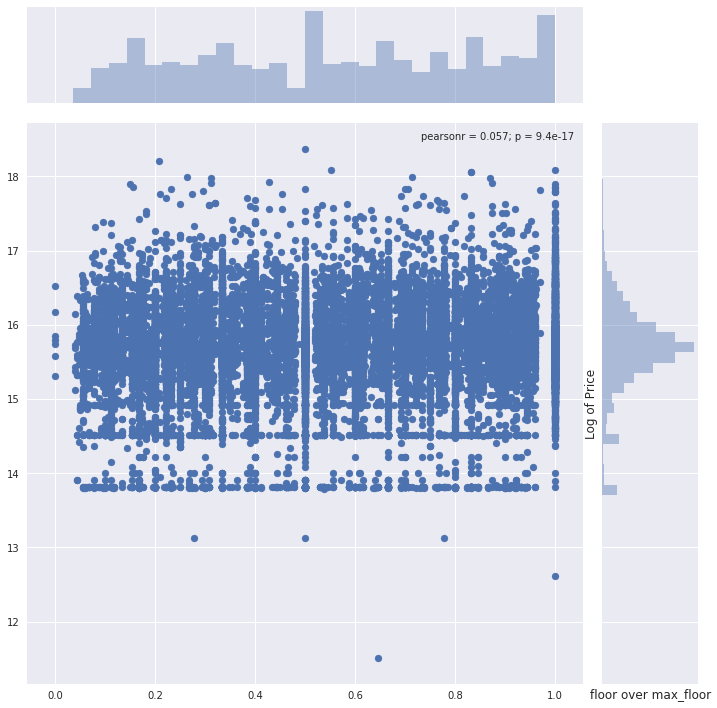

In [14]:
train['floor_overall'] = train['floor']/(train['max_floor']+1)
train.ix[train['floor_overall']>1, 'floor_overall'] =1
plt.figure(figsize=(12,12))
sns.jointplot(x=train.floor_overall.values, y=np.log1p(train.price_doc.values), size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('floor over max_floor', fontsize=12)
plt.show()

#### material -- wall material

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


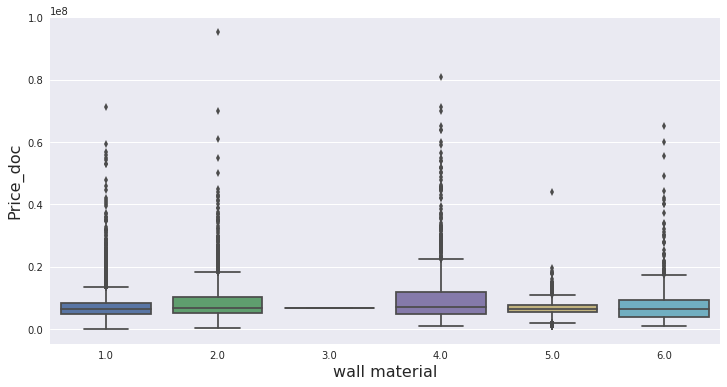

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='material', y ='price_doc', data = train)
plt.xlabel('wall material', fontsize= 16)
plt.ylabel('Price_doc', fontsize=16)

#### build_year -- year built

In [16]:
train['year'] = train['timestamp'].dt.year
# fix some input error
train.loc[train['build_year'] == 20052009, 'build_year'] = 2005
train.loc[train['build_year'] == 4965, 'build_year'] = 1965
train.loc[train['build_year'] == 0, 'build_year'] = 2000
train.loc[train['build_year'] == 1, 'build_year'] = 2001
train.loc[train['build_year'] == 2, 'build_year'] = 2002
train.loc[train['build_year'] == 3, 'build_year'] = 2003
train.loc[train['build_year'] == 20, 'build_year'] = 1920
train.loc[train['build_year'] == 215, 'build_year'] = 2015
train.loc[train['build_year'] == 71, 'build_year'] = 1971

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


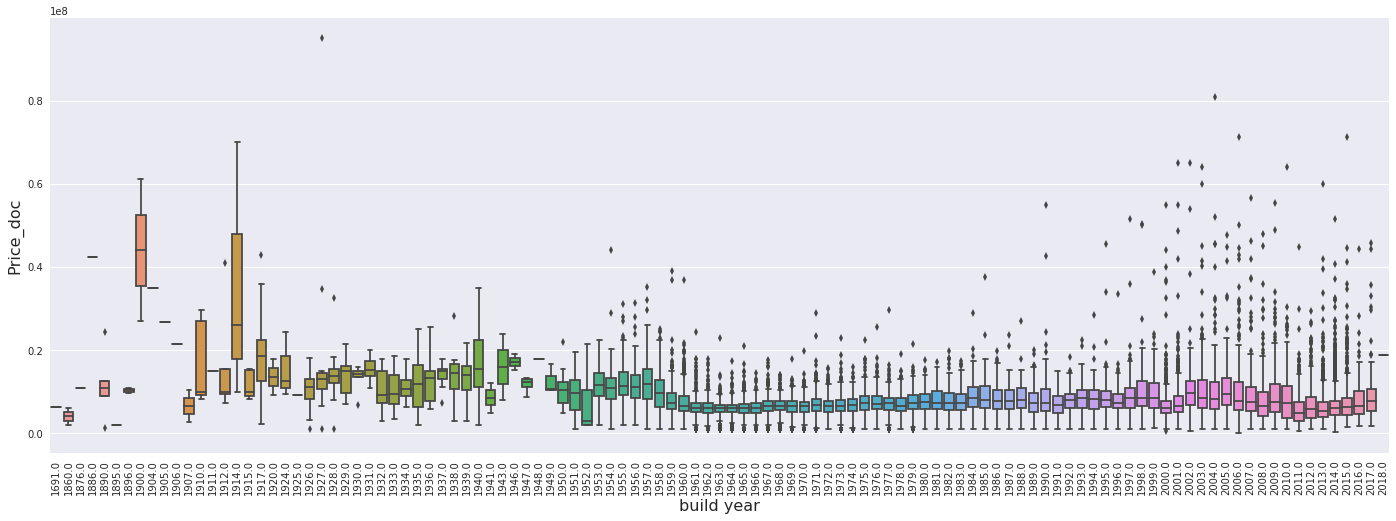

In [17]:
plt.figure(figsize=(24,8))
sns.boxplot(x="build_year", y="price_doc", data=train)
plt.ylabel('Price_doc', fontsize=16)
plt.xlabel('build year', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


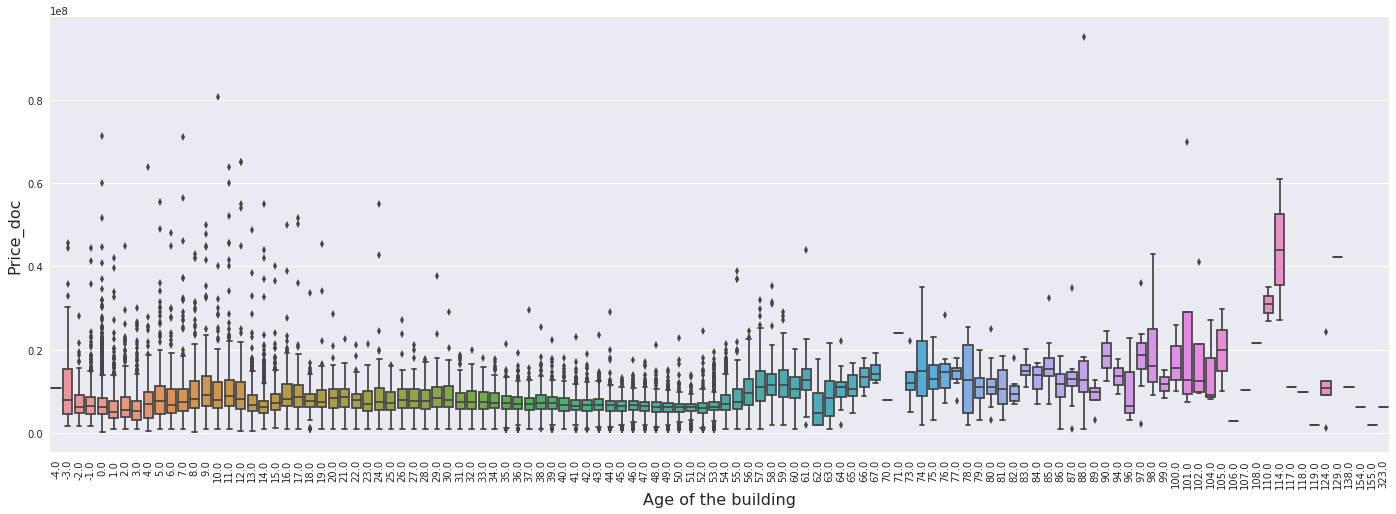

In [18]:
train['build_age'] = train['year'] - train['build_year']
train['build_age'].fillna(0)
plt.figure(figsize=(24,8))
sns.boxplot(x="build_age", y="price_doc", data=train)
plt.ylabel('Price_doc', fontsize=16)
plt.xlabel('Age of the building', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

#### state: apartment condition

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


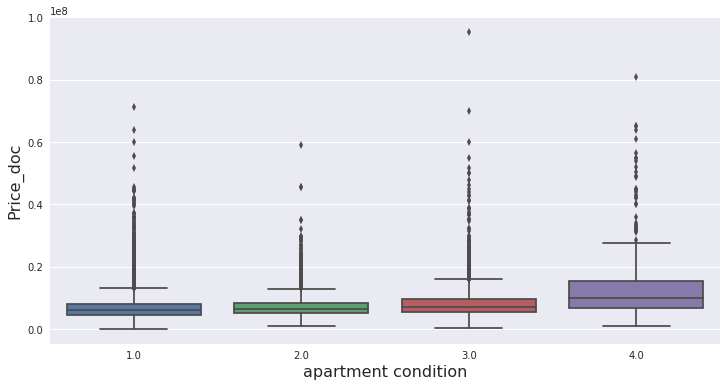

In [31]:
train.loc[train['state'] == 33, 'state'] = 3
plt.figure(figsize=(12,6))
sns.boxplot(x='state', y ='price_doc', data = train)
plt.xlabel('Apartment condition', fontsize= 16)
plt.ylabel('Price_doc', fontsize=16)
plt.show()

#### product_type: owner-occupier purchase or investment

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


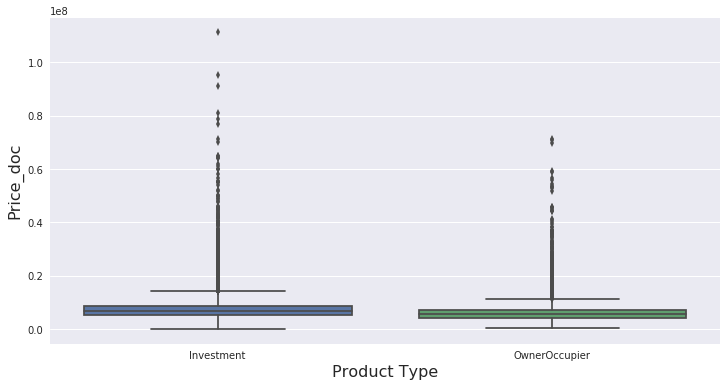

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='product_type', y ='price_doc', data = train)
plt.xlabel('Product Type', fontsize= 16)
plt.ylabel('Price_doc', fontsize=16)
plt.show()